In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
data = pd.read_csv('data\\project\\wave1_lip_dummies.csv', header=0, na_values=' ', index_col=0)

In [4]:
data.head()

,H1GI20,H1DA8,H1DA9,H1DA10,H1GH1,H1GH28,H1GH42,H1GH44,H1GH46,H1GH59A,...,BST90P13_3,BST90P24_1,BST90P24_2,BST90P24_3,BST90P24_4,BST90P24_5,BST90P24_6,BST90P26_1,BST90P26_2,BST90P26_3
AID,,,,,,,,,,,,,,,,,,,,,
57101310,11,33,4.0,0,4,5,4,5,5,6,...,0,0,0,0,0,0,1,0,0,1
57103869,12,24,6.0,7,4,2,4,4,5,6,...,1,0,1,0,0,0,0,0,1,0
57109625,8,14,7.0,3,1,2,2,4,4,5,...,0,0,1,0,0,0,0,0,0,1
57111071,8,35,12.0,2,2,4,3,3,3,5,...,0,0,1,0,0,0,0,0,0,1
57113943,9,10,5.0,4,3,4,3,4,5,6,...,1,0,1,0,0,0,0,1,0,0


In [5]:
#for col in data.columns:
#    if "BST" in col:
#        data.drop(col, axis=1, inplace=True)

In [6]:
target = data["C_JOINT2"]

In [7]:
target.head()

AID
57101310    1
57103869    0
57109625    0
57111071    0
57113943    0
Name: C_JOINT2, dtype: int64

In [8]:
target.value_counts()

0    4686
1     421
Name: C_JOINT2, dtype: int64

In [9]:
data.drop("C_JOINT2", axis=1, inplace=True)

In [10]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [11]:
data_train.shape

(4085, 499)

In [12]:
data_test.shape

(1022, 499)

In [13]:
target_train.shape

(4085,)

In [14]:
target_test.shape

(1022,)

In [15]:
target_train.value_counts()

0    3748
1     337
Name: C_JOINT2, dtype: int64

In [16]:
target_test.value_counts()

0    938
1     84
Name: C_JOINT2, dtype: int64

In [17]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_train)
train_norm = min_max_scaler.fit_transform(data_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(data_test)
test_norm = min_max_scaler.fit_transform(data_test)

In [18]:
target_train = np.array(target_train)
target_test = np.array(target_test)

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       938
          1       0.11      0.10      0.10        84

avg / total       0.85      0.86      0.86      1022

Accuracy: 0.86


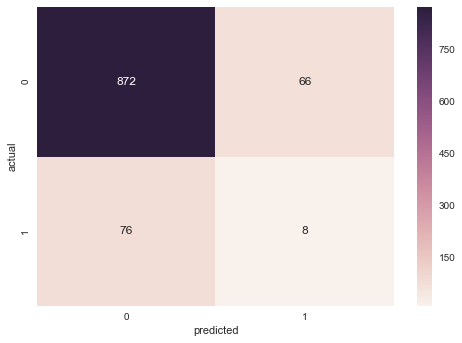

In [19]:
data_knn = KNeighborsClassifier(n_neighbors = 1, weights='distance', metric='euclidean', n_jobs=-1)
data_knn.fit(train_norm, target_train)
target_predict = data_knn.predict(test_norm)

print(classification_report(target_test, target_predict))

knn_confusion_matrix = confusion_matrix(y_true = target_test, y_pred = target_predict)
print("Accuracy: %0.2f" % data_knn.score(test_norm, target_test))

ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.show()

In [20]:
df_find_k = pd.DataFrame(columns=['accuracy', 'recall_class_0', 'recall_class_1', 'recall_avg_over_total'])

for k in range(1,11):
        data_knn = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='euclidean', n_jobs=-1)
        data_knn.fit(train_norm, target_train)
        target_predict = data_knn.predict(test_norm)
        
        recall = recall_score(target_test, target_predict, average=None)
        df_find_k.loc[k] = [data_knn.score(test_norm, target_test), recall[0], recall[1], recall_score(target_test, target_predict, average='micro')]

In [21]:
df_find_k.head()

,accuracy,recall_class_0,recall_class_1,recall_avg_over_total
1,0.861057,0.929638,0.095238,0.861057
2,0.861057,0.929638,0.095238,0.861057
3,0.903131,0.984009,0.000000,0.903131
4,0.903131,0.984009,0.000000,0.903131
5,0.914873,0.996802,0.000000,0.914873


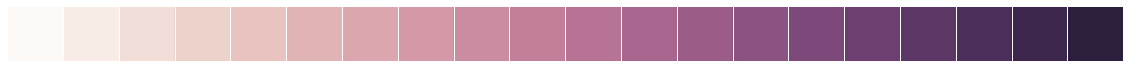

In [22]:
sns.palplot(sns.cubehelix_palette(20, light=.98))
plt.show()

In [23]:
pal = sns.cubehelix_palette(20, light=.98)
pal = pal.as_hex()
pal[0]

'#fcf9f7'

In [24]:
sns.set(rc={'axes.facecolor':pal[0]})

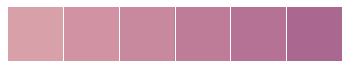

In [25]:
sns.palplot(sns.cubehelix_palette(6, dark=.50, light=.70))
plt.show()

In [26]:
cmap = (sns.cubehelix_palette(6, dark=.50, light=.70, as_cmap=True))

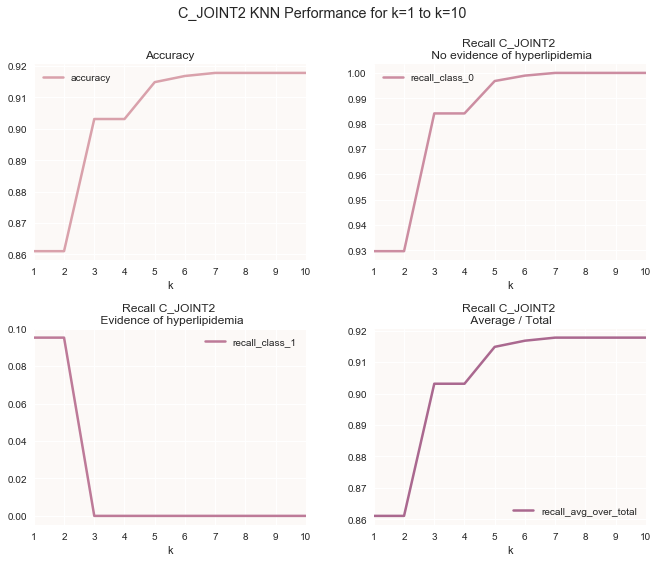

In [27]:
figure = plt.figure()
df_find_k.plot(subplots=True, layout=(2, 2), figsize=(10, 8),  sharex=False, title='C_JOINT2 KNN Performance for k=1 to k=10', linewidth=2.5, colormap=cmap)
plt.subplot(221)
plt.xlabel('k')
plt.title('Accuracy')
plt.subplot(222)
plt.xlabel('k')
plt.title('Recall C_JOINT2 \n No evidence of hyperlipidemia')
plt.subplot(223)
plt.xlabel('k')
plt.title('Recall C_JOINT2 \n Evidence of hyperlipidemia')
plt.subplot(224)
plt.xlabel('k')
plt.title('Recall C_JOINT2 \n Average / Total')
plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.25)
plt.savefig('lipid_k_1_to_10.png', dpi=300)
plt.show()

             precision    recall  f1-score   support

          0       0.92      0.93      0.92       938
          1       0.11      0.10      0.10        84

avg / total       0.85      0.86      0.86      1022

Accuracy: 0.86


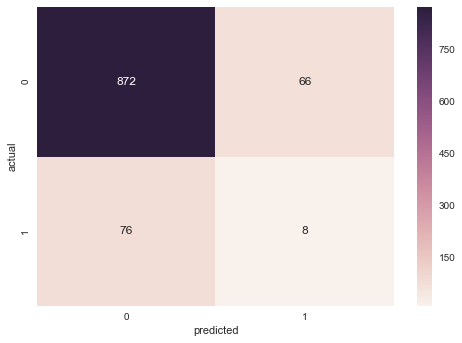

In [28]:
data_knn = KNeighborsClassifier(n_neighbors = 2, weights='distance', metric='euclidean', n_jobs=-1)
data_knn.fit(train_norm, target_train)
target_predict = data_knn.predict(test_norm)

print(classification_report(target_test, target_predict))

knn_confusion_matrix = confusion_matrix(y_true = target_test, y_pred = target_predict)
print("Accuracy: %0.2f" % data_knn.score(test_norm, target_test))

ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.show()

In [29]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_norm = min_max_scaler.fit_transform(data)

In [30]:
data_knn = KNeighborsClassifier(n_neighbors = 2, weights='distance', metric='euclidean', n_jobs=-1)

In [31]:
predicted = cross_val_predict(data_knn, data_norm, target, cv=10)
classification_report = classification_report(target, predicted)
knn_confusion_matrix = confusion_matrix(y_true = target, y_pred = predicted)
scores = cross_val_score(data_knn, data_norm, target, cv=10)

             precision    recall  f1-score   support

          0       0.92      0.93      0.92      4686
          1       0.07      0.06      0.07       421

avg / total       0.85      0.86      0.85      5107

Accuracy: 0.86 (+/- 0.02)


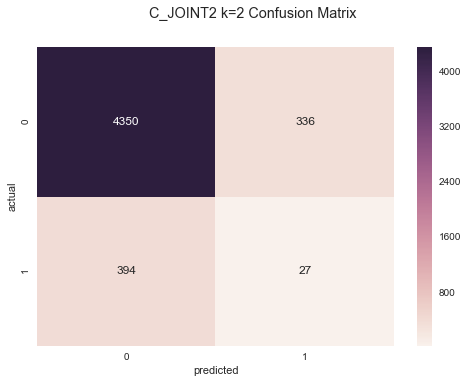

In [33]:
print(classification_report)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.suptitle('C_JOINT2 k=2 Confusion Matrix')
plt.savefig('lipid_k2_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()